## First EXP with UKB
- julian provided data from UKB, a plausible DAG and Functions from lit.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0)

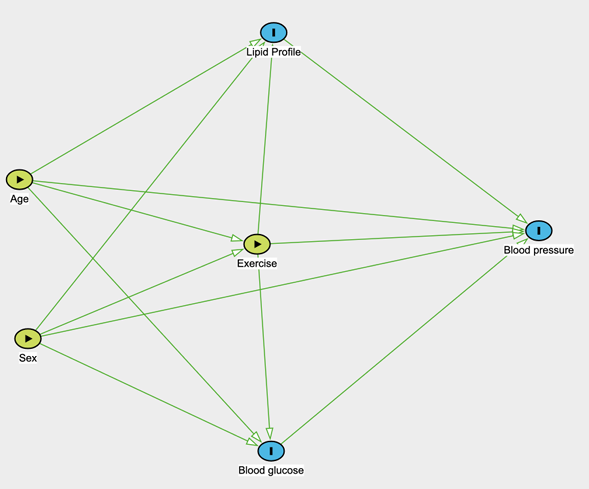

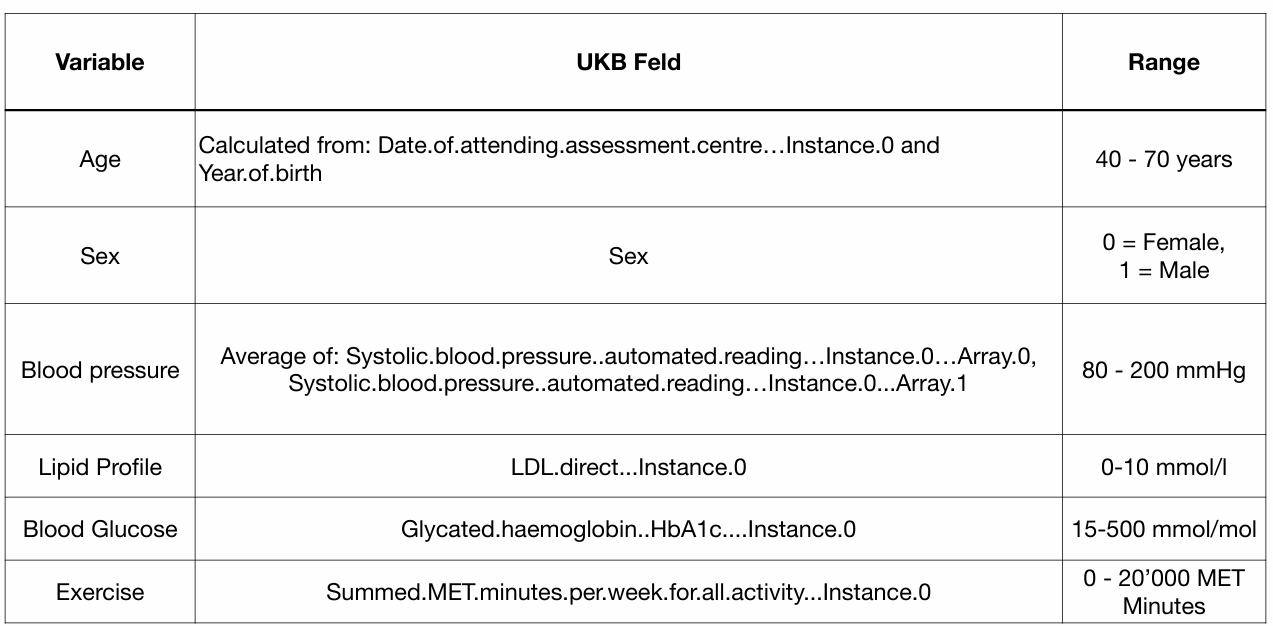

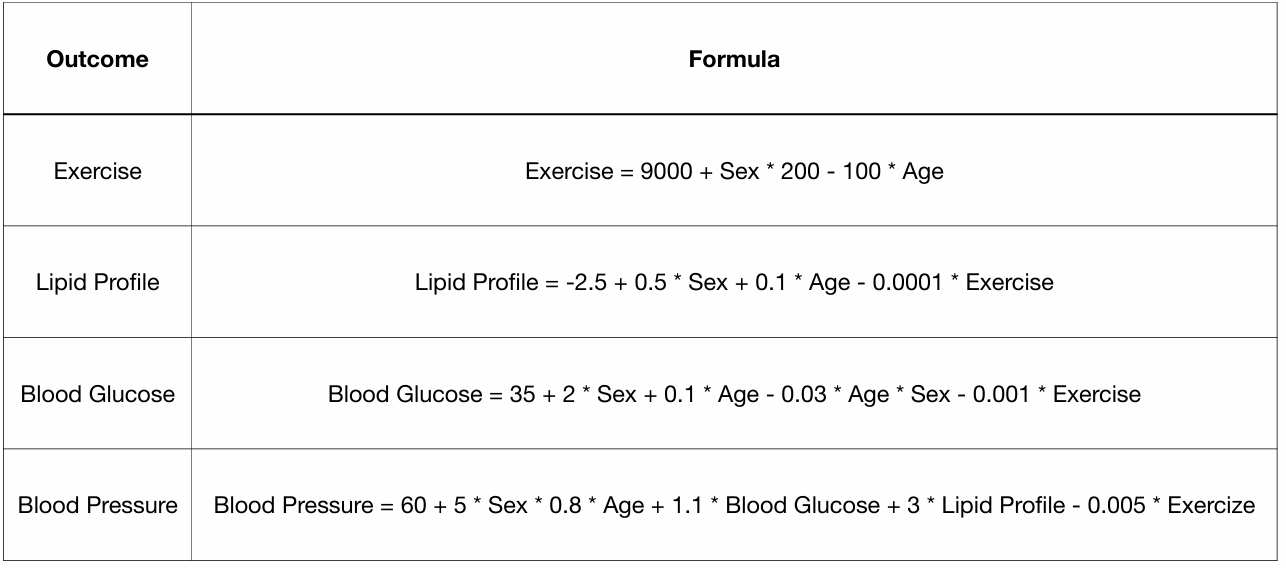

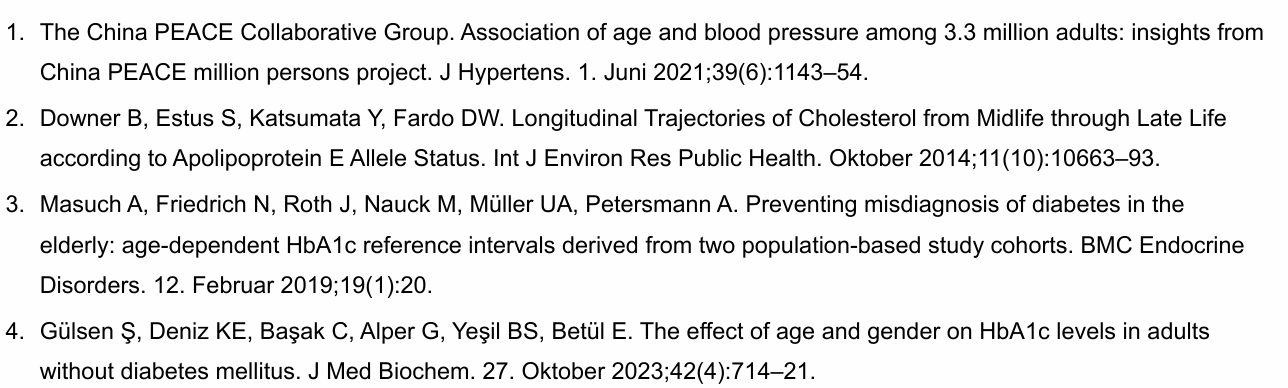

## UKB Data

In [2]:
full_ukb_df=pd.read_csv('/nasdata/UKB/TRAM_DAG_jd_oct25.csv')

/tmp/ipykernel_1337361/327719548.py:1: DtypeWarning: Columns (43,47,51,75,104,105,108,109,113,141,142,143,147,149,150,151,155,157,158,159,161,162,163,333,335,337,339,341,343,345,347,376,377,378,379,399,405,406,407,417,419,421,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  full_ukb_df=pd.read_csv('/nasdata/UKB/TRAM_DAG_jd_oct25.csv')


In [3]:
list(full_ukb_df.columns)

['Date of attending assessment centre | Instance 0',
 'Date of attending assessment centre | Instance 1',
 'Date of attending assessment centre | Instance 2',
 'Date of attending assessment centre | Instance 3',
 'Year of birth',
 'Sex',
 'Systolic blood pressure, automated reading | Instance 0 | Array 0',
 'Systolic blood pressure, automated reading | Instance 0 | Array 1',
 'Systolic blood pressure, automated reading | Instance 1 | Array 0',
 'Systolic blood pressure, automated reading | Instance 1 | Array 1',
 'Systolic blood pressure, automated reading | Instance 2 | Array 0',
 'Systolic blood pressure, automated reading | Instance 2 | Array 1',
 'Systolic blood pressure, automated reading | Instance 3 | Array 0',
 'Systolic blood pressure, automated reading | Instance 3 | Array 1',
 'Diastolic blood pressure, automated reading | Instance 0 | Array 0',
 'Diastolic blood pressure, automated reading | Instance 0 | Array 1',
 'Diastolic blood pressure, automated reading | Instance 1 |

### AGE

In [4]:
full_ukb_df['Age_baseline | Instance 0'] = pd.to_datetime(full_ukb_df['Date of attending assessment centre | Instance 0']).dt.year - full_ukb_df['Year of birth']
full_ukb_df['Age_baseline | Instance 0'].head()

0    64
1    66
2    67
3    50
4    44
Name: Age_baseline | Instance 0, dtype: int64

### Blood Pressure

In [5]:
full_ukb_df['Avg_sys_blood_Array_0_1 | Instance 0']=(full_ukb_df['Systolic blood pressure, automated reading | Instance 0 | Array 0']+full_ukb_df['Systolic blood pressure, automated reading | Instance 0 | Array 1'])/2
full_ukb_df['Avg_sys_blood_Array_0_1 | Instance 0'].head()

0    137.0
1    134.5
2    150.0
3    152.5
4    119.5
Name: Avg_sys_blood_Array_0_1 | Instance 0, dtype: float64

### Sex

In [6]:
full_ukb_df['Sex'].head()

0      Male
1      Male
2      Male
3      Male
4    Female
Name: Sex, dtype: object

###  Lipid Profile

In [7]:
full_ukb_df['LDL direct | Instance 0'].head()

0    4.059
1    3.388
2    3.311
3    3.478
4    2.930
Name: LDL direct | Instance 0, dtype: float64

###  Blood Glucose

In [8]:
full_ukb_df['Glycated haemoglobin (HbA1c) | Instance 0'].head()

0    39.0
1    39.6
2    36.5
3    31.3
4    37.9
Name: Glycated haemoglobin (HbA1c) | Instance 0, dtype: float64

### Excercise

In [9]:
full_ukb_df['Summed MET minutes per week for all activity | Instance 0'].head()

0    5799.0
1    4958.0
2       NaN
3    1496.0
4     396.0
Name: Summed MET minutes per week for all activity | Instance 0, dtype: float64

## Combine

In [10]:
# information from Julian and mappings for variables to KISS
variable_mapping = [
    ["Age", "age", "40 – 70", "years", "Age_baseline | Instance 0"],
    ["Sex", "sex", "0 = Female, 1 = Male", "binary", "Sex"],
    ["Exercise", "exercise", "0 – 20 000", "MET-min/week", "Summed MET minutes per week for all activity | Instance 0"],
    ["Lipid Profile", "lipid", "0 – 10", "mmol/L", "LDL direct | Instance 0"],
    ["Blood Glucose", "glucose", "15 – 500", "mmol/mol", "Glycated haemoglobin (HbA1c) | Instance 0"],
    ["Blood Pressure", "bp", "80 – 200", "mmHg",
     "Avg_sys_blood_Array_0_1 | Instance 0"],
]

df_vars = pd.DataFrame(variable_mapping, columns=["Variable", "Symbol", "Range", "Unit / Levels", "Original Variable"])
df_vars

,Variable,Symbol,Range,Unit / Levels,Original Variable
0,Age,age,40 – 70,years,Age_baseline | Instance 0
1,Sex,sex,"0 = Female, 1 = Male",binary,Sex
2,Exercise,exercise,0 – 20 000,MET-min/week,Summed MET minutes per week for all activity | Instance 0
3,Lipid Profile,lipid,0 – 10,mmol/L,LDL direct | Instance 0
4,Blood Glucose,glucose,15 – 500,mmol/mol,Glycated haemoglobin (HbA1c) | Instance 0
5,Blood Pressure,bp,80 – 200,mmHg,Avg_sys_blood_Array_0_1 | Instance 0


In [11]:
# subset of UKB with the selectred cols
ukb_subset=full_ukb_df[['Age_baseline | Instance 0','Sex','Avg_sys_blood_Array_0_1 | Instance 0','LDL direct | Instance 0','Glycated haemoglobin (HbA1c) | Instance 0','Summed MET minutes per week for all activity | Instance 0']]

# create mapping dictionary from 'Original Variable' to 'Symbol' , rename columns of ukb_subset accordingly
rename_map = dict(zip(df_vars["Original Variable"], df_vars["Symbol"]))

ukb_subset = ukb_subset.rename(columns=rename_map)
ukb_subset.head()



,age,sex,bp,lipid,glucose,exercise
0,64,Male,137.0,4.059,39.0,5799.0
1,66,Male,134.5,3.388,39.6,4958.0
2,67,Male,150.0,3.311,36.5,NaN
3,50,Male,152.5,3.478,31.3,1496.0
4,44,Female,119.5,2.930,37.9,396.0


### trransformations and manipulation

In [12]:

ukb_subset.dropna(inplace=False)

ukb_subset['sex'] = ukb_subset['sex'].map({'Male': 1, 'Female': 0})
ukb_subset['age'] = ukb_subset['age'].astype(float)

ukb_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501931 entries, 0 to 501930
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       501931 non-null  float64
 1   sex       501931 non-null  int64  
 2   bp        456435 non-null  float64
 3   lipid     468175 non-null  float64
 4   glucose   465980 non-null  float64
 5   exercise  384831 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 23.0 MB


In [13]:
ukb_subset.describe()

,age,sex,bp,lipid,glucose,exercise
count,501931.000000,501931.000000,456435.000000,468175.000000,465980.000000,384831.000000
mean,57.043618,0.456035,137.782788,3.556376,36.132487,2644.953106
std,8.102636,0.498064,18.626290,0.870037,6.777457,2653.212517
min,38.000000,0.000000,65.000000,0.266000,15.000000,0.000000
25%,51.000000,0.000000,124.500000,2.944000,32.800000,813.000000
50%,58.000000,0.000000,136.000000,3.516000,35.200000,1786.000000
75%,64.000000,1.000000,149.500000,4.117000,37.900000,3564.000000
max,73.000000,1.000000,253.500000,9.797000,515.200000,19278.000000


In [14]:
ukb_subset.to_csv('UKB_subset_jd_oct25.csv', index=False)

KeyboardInterrupt: 

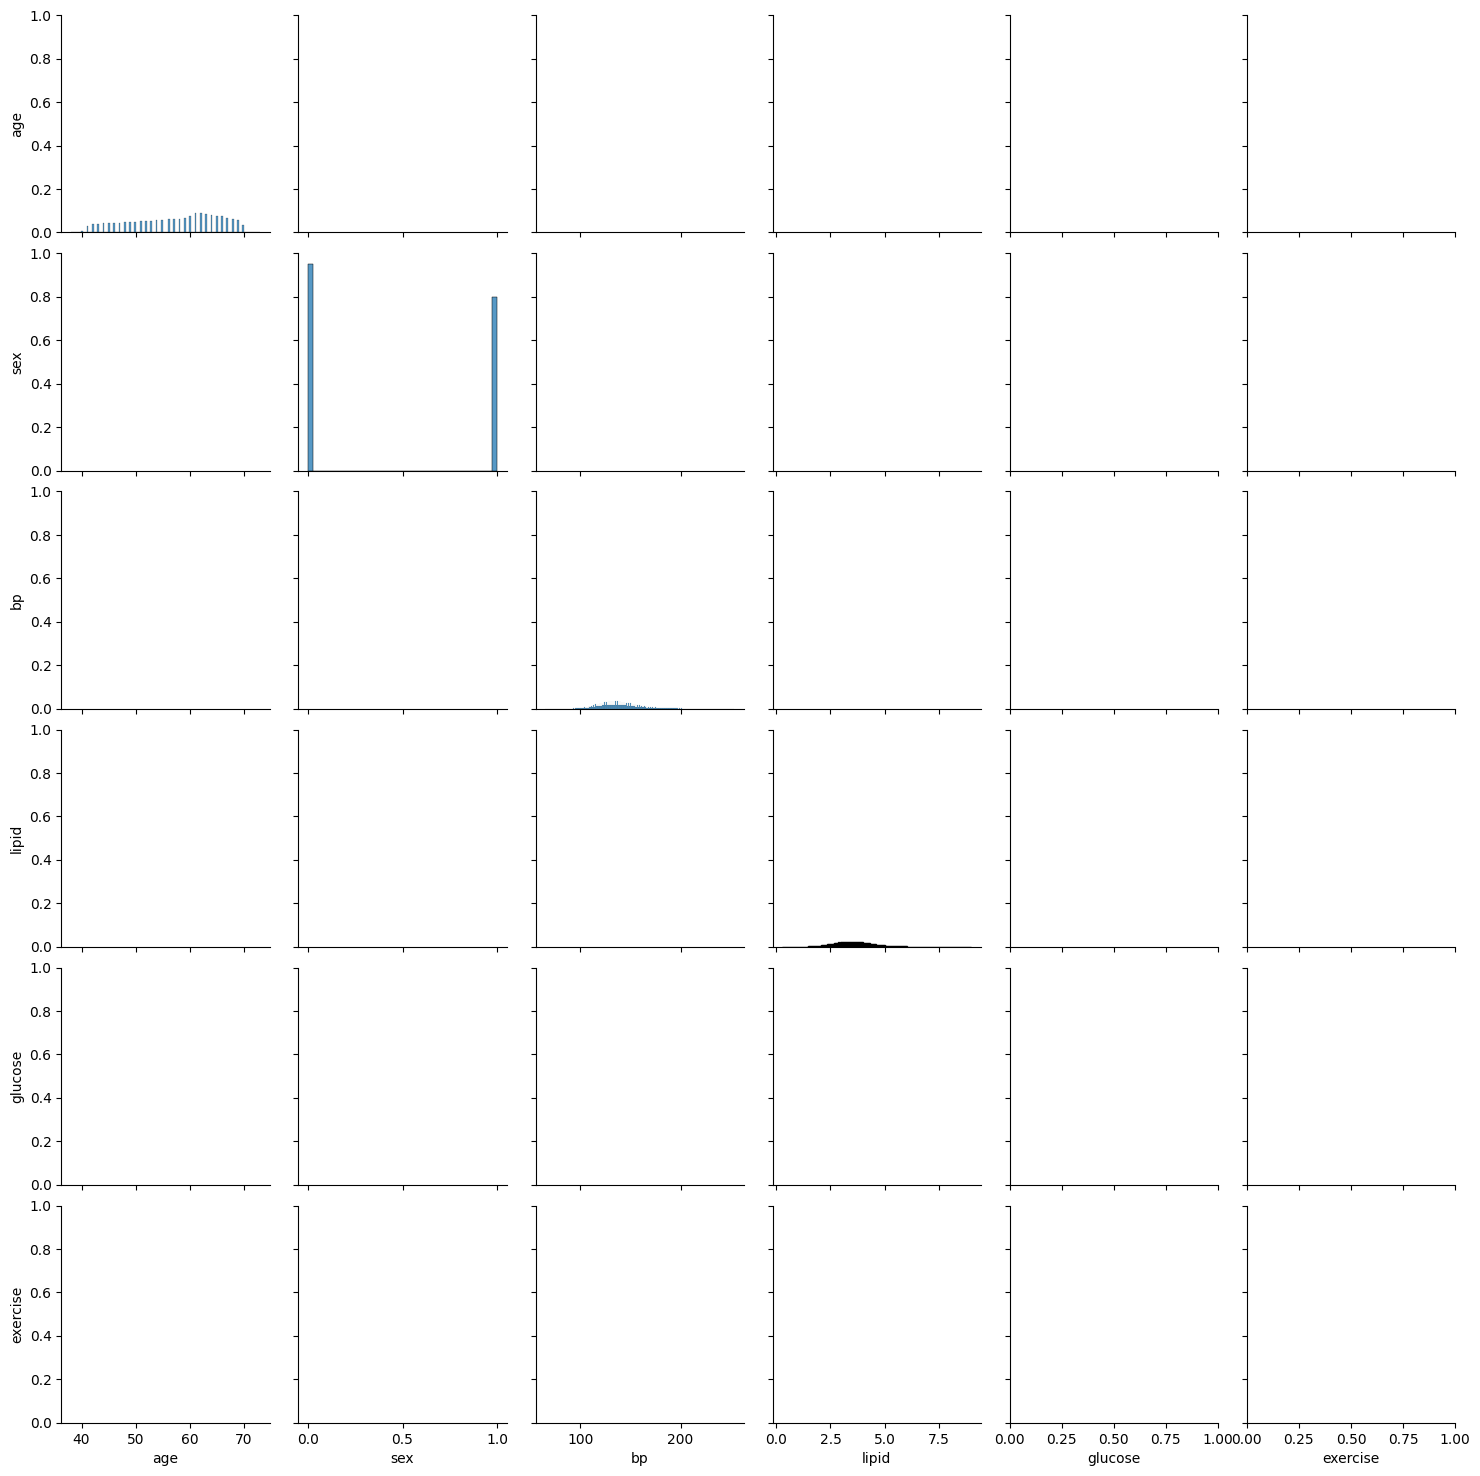

In [15]:
sns.pairplot(ukb_subset)

## Source Nodes distributions

<Axes: >

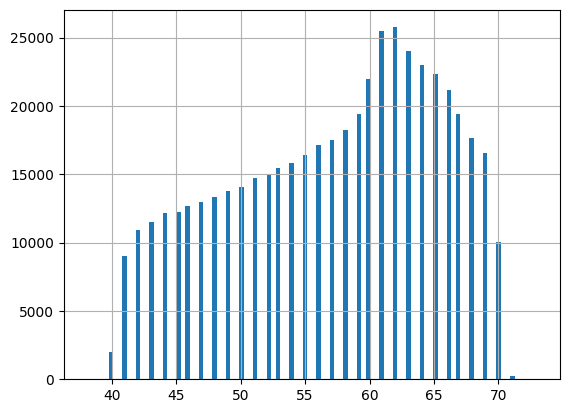

In [ ]:
ukb_subset['age'].hist(bins=100)

In [ ]:
plt.hist(ukb_subset['age'], bins=100, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Empirical Age Distribution')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
sum(ukb_subset['sex']==1)/len(ukb_subset)
0.4560347936270125


0.4560347936270125

## Simulate

In [ ]:

def simulate_dag(n_obs=1000, doX=None, seed=None):
    """
    Simulate data according to the DAG 'Effect of exercise on CVRF'
    with optional interventions (do-operations).

    Parameters
    ----------
    n_obs : int
        Number of observations to generate.
    doX : dict or None
        Optional interventions, e.g. {'sex':1, 'exercise':10000}.
        Fixes variables to constants before propagation.
    seed : int or None
        Random seed.

    Returns
    -------
    pd.DataFrame
        Simulated dataset.
    """
    if seed is not None:
        np.random.seed(seed)

    if doX is None:
        doX = {}

    # --- 1. exogenous variables ---
    
    #  age
    # age = np.full(n_obs, doX['age']) if 'age' in doX else np.random.uniform(40, 70, n_obs)
    age = ukb_subset['age'].sample(n=n_obs, replace=True).to_numpy() # direct sampling from empirical distribution
    
    p=0.4560347936270125                                               # proportion form empirical distribution
    sex = np.full(n_obs, doX['sex']) if 'sex' in doX else np.random.binomial(1, p, n_obs)

    #exercise 
    if 'exercise' in doX:
        exercise = np.full(n_obs, doX['exercise'])
    else:
        exercise = 9000 + 200 * sex - 100 * age + np.random.normal(0, 800, n_obs)
        # exercise = np.clip(exercise, 0, 20000)

    # lipid profile 
    if 'lipid' in doX:
        lipid = np.full(n_obs, doX['lipid'])
    else:
        lipid = -2.5 + 0.5 * sex + 0.1 * age - 0.0001 * exercise + np.random.normal(0, 0.3, n_obs)
        # lipid = np.clip(lipid, 0, 10)

    # blood glucose 
    if 'glucose' in doX:
        glucose = np.full(n_obs, doX['glucose'])
    else:
        glucose = 35 + 2 * sex + 0.1 * age - 0.03 * age * sex - 0.001 * exercise + np.random.normal(0, 10, n_obs)
        # glucose = np.clip(glucose, 15, 500)

    # blood pressure 
    if 'bp' in doX:
        bp = np.full(n_obs, doX['bp'])
    else:
        bp = 60 + 5 * sex * 0.8 * age + 1.1 * glucose + 3 * lipid - 0.005 * exercise + np.random.normal(0, 5, n_obs)
        # bp = np.clip(bp, 80, 200)

    return pd.DataFrame({
        'age': age,
        'sex': sex,
        'exercise': exercise,
        'lipid': lipid,
        'glucose': glucose,
        'bp': bp
    })




In [ ]:
import seaborn as sns
df_simulated = simulate_dag(1000, doX=None, seed=42)
print(df_simulated.head())

    age  sex     exercise     lipid    glucose          bp
0  58.0    1  3197.851450  3.321234  51.876439  342.549372
1  64.0    1  3113.667624  4.156021  26.949614  337.004592
2  70.0    0  1848.882650  4.567570  36.384113   97.936930
3  70.0    1  2642.458621  4.550463  37.194393  391.024872
4  52.0    0  3773.050778  2.978990  42.479186   95.999241


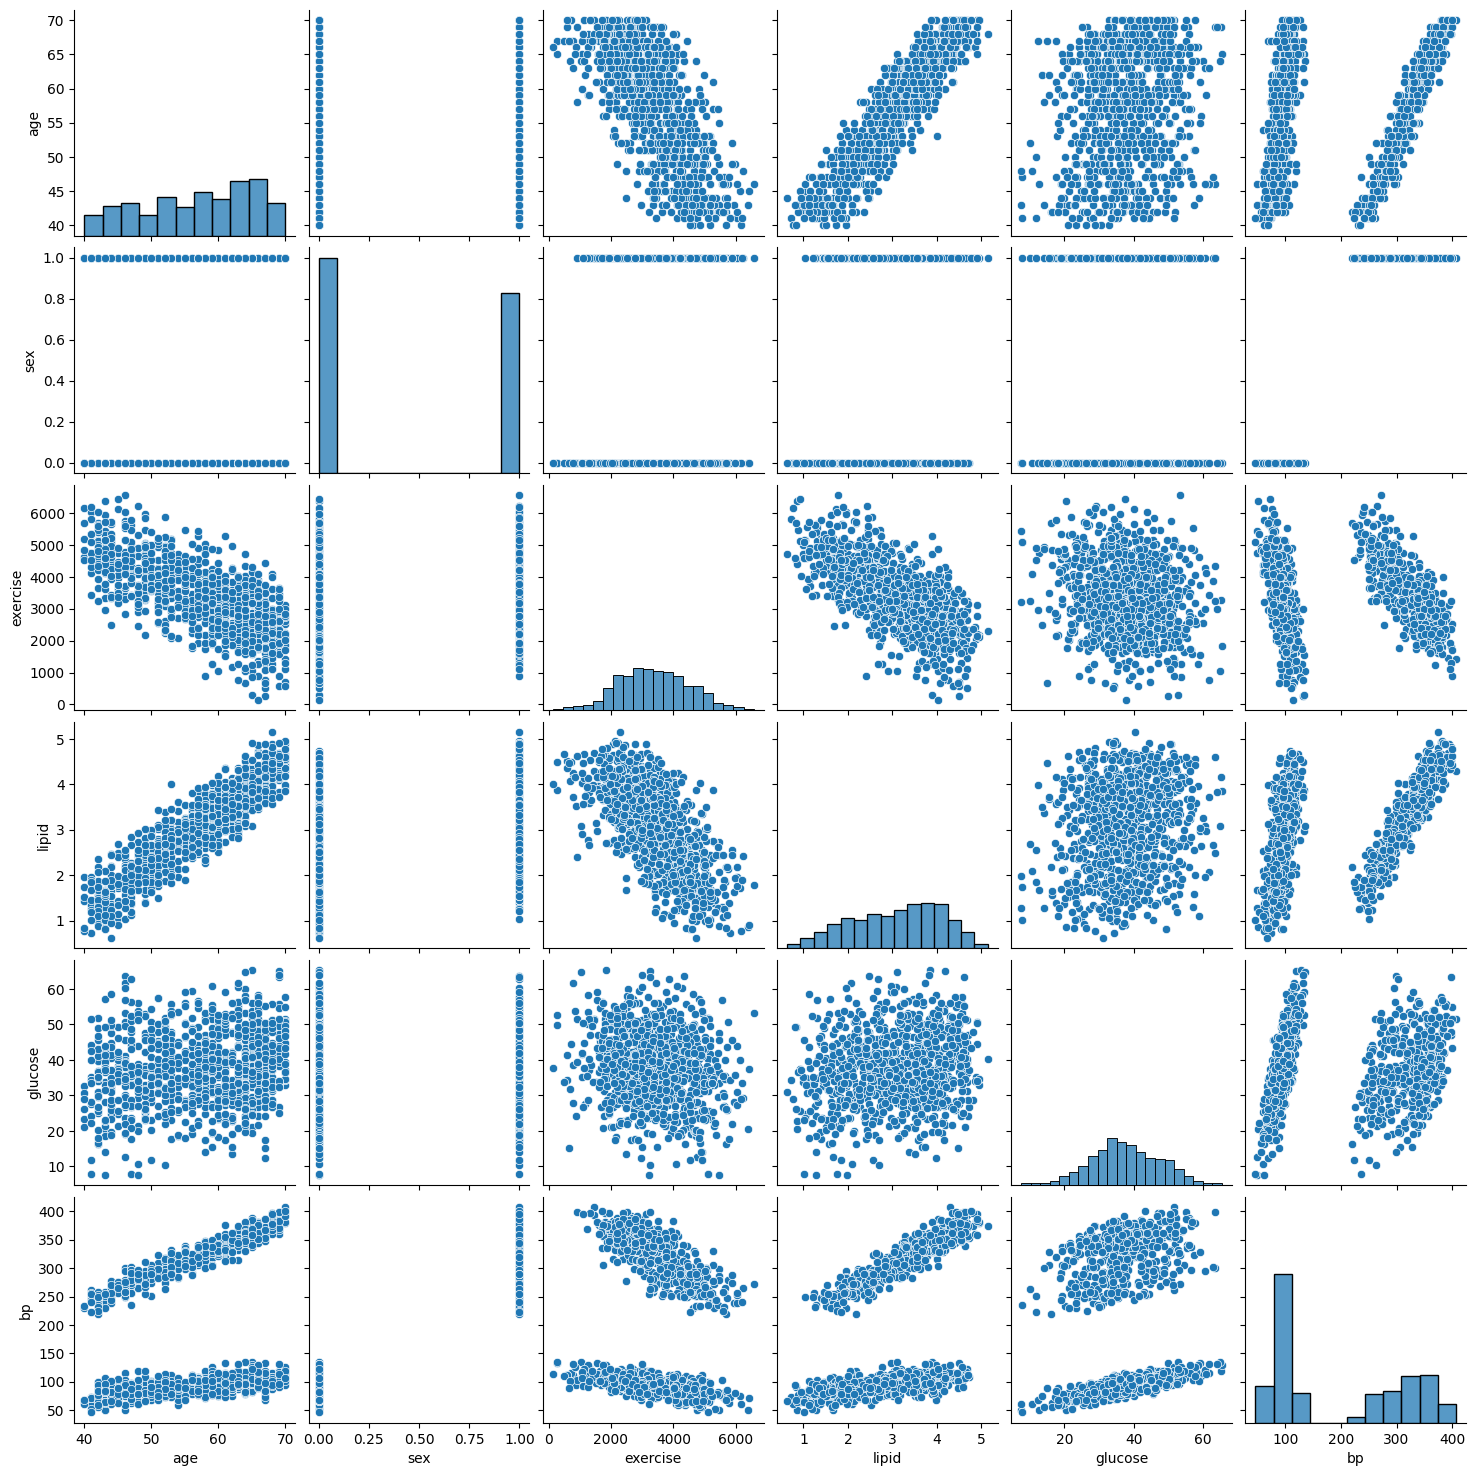

In [ ]:
sns.pairplot(df_simulated)

In [ ]:
df_simulated.describe()

,age,sex,exercise,lipid,glucose,bp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,56.948000,0.456000,3378.201032,3.076419,37.590329,197.788263
std,8.363088,0.498309,1131.763461,0.992435,10.138374,117.780431
min,40.000000,0.000000,133.984343,0.629518,7.571086,46.009901
25%,50.000000,0.000000,2550.000351,2.293142,30.836854,92.256680
50%,58.000000,0.000000,3343.448286,3.202748,37.231882,115.887326
75%,64.000000,1.000000,4181.916100,3.890882,44.602263,322.453552
max,70.000000,1.000000,6571.902109,5.143646,65.373679,407.123044
